# Домашнее задание
## Harry Potter and the Action Prediction Challenge from Natural Language

*deadline*: 14 ноября 2022, 23:59

В этом домашнем задании вы будете работать с корпусом Harry Potter and the Action Prediction Challenge. Корпус собран из фанфиков о Гарри Поттере и состоит из двух частей: 1) сырые тексты, 2) фрагменты текстов, описывающих ситуацию, в которой произнесено заклинание.

Корпус описан в статье: https://arxiv.org/pdf/1905.11037.pdf

David Vilares and Carlos Gómez-Rodríguez. Harry Potter and the Action Prediction Challenge from Natural Language. 2019 Annual Conference of the North American Chapter of the Association for Computational Linguistics. To appear.

Код для сбора корпуса находится в репозитории: https://github.com/aghie/hpac . Корпус можно скачать по инструкции из этого репозитория, но для экономии времени авторы задания уже скачали и подготовили данные к работе. 

Ссылки на собранный корпус: 
* Сырые тексты:  https://www.dropbox.com/s/23xet9kvbqna1qs/hpac_raw.zip?dl=0
* Токенизированные тексты в нижнем регистре: https://www.dropbox.com/s/gwfgmomdbetvdye/hpac_lower_tokenized.zip?dl=0
* train-test-dev: https://www.dropbox.com/s/3vdz0mouvex8abd/hpac_splits.zip?dl=0

Части 1, 2 задания должны быть выполнены на полных текстах (сырых или предобработанных -- на ваше усмотрение), Часть 3 – на разбиение на тестовое, отладочное и обучающее множества. Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров. 

В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
3. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
4. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
5. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
6. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 

## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-1000 слов по частоте без учета стоп-слов.
2. Найдите топ-10 по частоте: имен, пар имя + фамилия, пар вида ''профессор'' + имя / фамилия. 

[бонус] Постройте тематическую модель по корпусу HPAC.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для фанфиков или фентези-тематики)

In [1]:
import multiprocessing
import os
import sys
import zipfile
from collections import Counter

import fasttext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm

print(f"""{sys.version=}""")
print(f"""{pd.__version__=}""")
print(f"""{np.__version__=}""")

sys.version='3.10.8 (main, Oct 18 2022, 22:21:01) [GCC 9.4.0]'
pd.__version__='1.4.4'
np.__version__='1.23.4'


In [2]:
root = "/home/asciishell/s3/jupyter.asciishell.ru/nlp_hw_1"
root2 = "/home/asciishell/s3/jupyter-storage-1/nlp_hw_1"

In [3]:
data = []
with zipfile.ZipFile(f"{root}/hpac_lower_tokenized.zip") as f:
    for fname in tqdm(f.filelist):
        if fname.compress_size == 0:
            continue
        data.append({"fname": fname.filename, "text": f.read(fname.filename).decode()})
data = pd.DataFrame(data)

  0%|          | 0/36226 [00:00<?, ?it/s]

In [4]:
data.head()

,fname,text
0,hpac_source/4472122,... ` that wand 's more trouble than it 's wor...
1,hpac_source/5214134,it 's quite simple ... . you may look but you ...
2,hpac_source/5287826,i own none of this . jo rowling does . -------...
3,hpac_source/11996224,chapter 1 : next-door neighbours he 's in the ...
4,hpac_source/7887747,a/n : i do not own anything ! this story is wr...


In [24]:
c = Counter()
stop_words = set(stopwords.words("english"))


def foo(text):
    return [x for x in text.split() if x not in stop_words and any([c.isalpha() for c in x])]


with multiprocessing.Pool(4) as pool:
    for tokens in tqdm(pool.imap_unordered(foo, data["text"].values), total=len(data)):
        c.update(tokens)

  0%|          | 0/36225 [00:00<?, ?it/s]

In [29]:
"" in c

False

In [27]:
with open(f"{root2}/top_1000.txt", "wt") as f:
    f.write("\n".join([k.replace("\n", " ") for k, v in c.most_common(1000)]))

In [28]:
!wc {root2}/top_1000.txt

 999 1000 6530 /home/asciishell/s3/jupyter-storage-1/nlp_hw_1/top_1000.txt


In [25]:
c.most_common(10)

[("'s", 4767265),
 ("n't", 4396020),
 ('harry', 3991017),
 ('said', 2262072),
 ('would', 1903185),
 ('hermione', 1826879),
 ('could', 1687864),
 ('back', 1396452),
 ('draco', 1386180),
 ('one', 1376314)]

## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса HPAC.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-1000 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [8]:
fasttext_file = f"{root2}/lower_tokenized.txt"
fasttext_model = f"{root2}/fasttext.bin"

if not os.path.exists(fasttext_file):
    data["text"].to_csv(fasttext_file, index=False, header=None)

In [10]:
!ls -alish {fasttext_model}*

1703939 873M -rw-r--r-- 1 asciishell asciishell 873M Nov  5 10:55 /home/asciishell/s3/jupyter-storage-1/nlp_hw_1/fasttext.bin.bin
1703940 118M -rw-r--r-- 1 asciishell asciishell 118M Nov  5 10:56 /home/asciishell/s3/jupyter-storage-1/nlp_hw_1/fasttext.bin.vec


Read 596M words
Number of words:  140787
Number of labels: 0
Progress: 100.0% words/sec/thread:   96979 lr:  0.000000 avg.loss:  0.299498 ETA:   0h 0m 0s avg.loss:  2.382985 ETA:   0h32m30s avg.loss:  1.930648 ETA:   0h31m55s avg.loss:  1.943473 ETA:   0h31m55s ETA:   0h31m54s 0.049338 avg.loss:  1.961795 ETA:   0h31m50s 0.049206 avg.loss:  1.975003 ETA:   0h31m47s  96601 lr:  0.048935 avg.loss:  1.980489 ETA:   0h31m28s 1.988230 ETA:   0h31m22s 1.986584 ETA:   0h31m18s lr:  0.048597 avg.loss:  1.986479 ETA:   0h31m 7s ETA:   0h30m55s lr:  0.047959 avg.loss:  1.969351 ETA:   0h30m36s 0.047888 avg.loss:  1.961988 ETA:   0h30m33s 1.940712 ETA:   0h30m25s 0.047601 avg.loss:  1.934765 ETA:   0h30m23s 0.046986 avg.loss:  1.901817 ETA:   0h30m 1s 1.899269 ETA:   0h29m58s 0.046643 avg.loss:  1.885855 ETA:   0h29m43s ETA:   0h29m35s avg.loss:  1.784903 ETA:   0h29m28s 1.540688 ETA:   0h29m12s avg.loss:  1.481387 ETA:   0h29m 6s 0.044598 avg.loss:  1.439557 ETA:   0h28m59s 1.258173 ETA:   0h28m

In [12]:
if not os.path.exists(fasttext_model + ".bin")  or not os.path.exists(fasttext_model + ".vec") :
    !/home/asciishell/project/fastText/fasttext skipgram -input {fasttext_file} -output {fasttext_model} -epoch 5 -lr 0.05 -thread 16

In [14]:
model = fasttext.load_model(fasttext_model + ".bin")

### Синонимы

In [20]:
model.get_nearest_neighbors("potion")

[(0.8544706702232361, 'pain-potion'),
 (0.8502705097198486, 'brew'),
 (0.8500850796699524, 'brewed'),
 (0.8495537638664246, 'concoction'),
 (0.846314013004303, 'decoction'),
 (0.8356342315673828, 'antidote'),
 (0.8303408622741699, 'blood-replenishing'),
 (0.8265400528907776, 'ingrediant'),
 (0.8226832747459412, 'concoctions'),
 (0.817173957824707, 'pepperup')]

In [21]:
model.get_nearest_neighbors("harry")

[(0.8508723378181458, '.'),
 (0.8338109254837036, 'hermione'),
 (0.8287236094474792, 'he'),
 (0.8246777057647705, ','),
 (0.8209803104400635, 'ron'),
 (0.813089907169342, 'draco'),
 (0.7983589768409729, 'then'),
 (0.7869053483009338, 'and'),
 (0.7773909568786621, 'again'),
 (0.7771849036216736, 'ginny')]

### Ассоциации

In [23]:
model.get_analogies("wowan", "man", "harry")

[(0.6799185276031494, 'yeah'),
 (0.6708487868309021, 'katrin4p'),
 (0.6635469794273376, 'hannahs'),
 (0.659058690071106, '"hannah'),
 (0.6589494347572327, 'anthony37'),
 (0.6588822603225708, 'ok'),
 (0.6571850776672363, 'danie'),
 (0.6546943783760071, 'edarcy03'),
 (0.6543132066726685, 'okay'),
 (0.6537677049636841, 'tokay')]

### Лишние слова
Что это?

### t-SNE

In [30]:
from sklearn.manifold import TSNE

In [48]:
with open(f"{root2}/top_1000.txt", "rt") as f:
    texts = f.readlines()
    
embeds = np.stack([model.get_word_vector(x) for x in texts])
embeds_tsne = TSNE(n_components=2, random_state=42, learning_rate="auto", init="pca").fit_transform(embeds)

/home/asciishell/project/venv3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


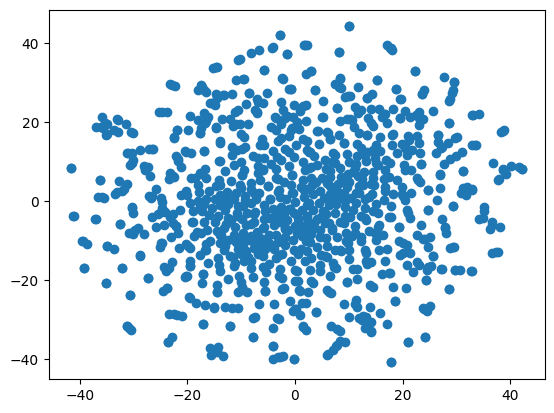

In [52]:
plt.scatter(*embeds_tsne.T)

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: данный фрагмент фанфика описывают какую-то ситуацию, которая предшествует произнесению заклинания. Требуется по тексту предсказать, какое именно заклинание будет произнесено. Таким образом, заклинание - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на частых и редких классах. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом заклинаний?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов. 

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные  или реккурентные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. 
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 500-1000 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

In [127]:
from sklearn.metrics import f1_score

In [59]:
df_train = pd.read_csv(f"{root}/hpac_corpus/hpac_training_128.tsv", sep="\t", header=None, names=["rnd", "target", "text"])
df_dev = pd.read_csv(f"{root}/hpac_corpus/hpac_dev_128.tsv", sep="\t", header=None, names=["rnd", "target", "text"])
df_test = pd.read_csv(f"{root}/hpac_corpus/hpac_test_128.tsv", sep="\t", header=None, names=["rnd", "target", "text"])

### FastText

In [92]:
fasttext_file = f"{root2}/train.txt"
fasttext_model = f"{root2}/fasttext_clf"

if not os.path.exists(fasttext_file) or True:
    df_train.assign(label=df_train["target"].map(lambda x: "__label__" + x))[["label", "text"]].to_csv(
        fasttext_file, index=False, header=None, sep=" ", quotechar="", escapechar=" ", quoting=3
    )
    
    df_dev.assign(label=df_train["target"].map(lambda x: "__label__" + x))[["label", "text"]].to_csv(
        fasttext_file + ".dev", index=False, header=None, sep=" ", quotechar="", escapechar=" ", quoting=3
    )

In [134]:
if not os.path.exists(fasttext_model + ".bin")  or not os.path.exists(fasttext_model + ".vec") or True:
    !/home/asciishell/project/fastText/fasttext supervised  \
        -input {fasttext_file} \
        -output {fasttext_model} \
        -autotune-validation {fasttext_file}.dev \
        -thread 16 \
        # -epoch 25 \
        # -lr 0.9 \
        # -pretrainedVectors {root}/wiki-news-300d-1M.vec \
        # -dim 300 \


Progress: 100.0% Trials:   23 Best score:  0.123471 ETA:   0h 0m 0ss
Training again with best arguments
Read 7M words
Number of words:  58022
Number of labels: 85
Progress: 100.0% words/sec/thread:  248748 lr:  0.000000 avg.loss:  3.862099 ETA:   0h 0m 0sm 1s


In [136]:
model = fasttext.load_model(fasttext_model + ".bin")

In [138]:
for name, sample in [('train', df_train), ('dev', df_dev), ('test', df_test)]:
    score = f1_score(
        sample["target"],
        [x[0].replace("__label__", "") for x in model.predict(list(sample["text"].values))[0]],
        average="macro",
    )
    print(f"Sample {name}\tscore:{score:.4f}")

Sample train	score:0.0045
Sample dev	score:0.0046
Sample test	score:0.0045


### LinearRegression

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import SnowballStemmer

In [154]:
stem = SnowballStemmer("english")

In [160]:
tfidf = TfidfVectorizer(min_df=10, max_df=0.5, ngram_range=(1, 2), max_features=30000)
x = tfidf.fit_transform([stem.stem(x) for x in tqdm(df_train["text"].values)])

  0%|          | 0/60980 [00:00<?, ?it/s]

In [161]:
x.shape

(60980, 30000)

In [162]:
lr = LogisticRegression(class_weight="balanced", max_iter=200)
lr.fit(x, df_train["target"])

LogisticRegression(class_weight='balanced', max_iter=200)

In [163]:
lr.predict(x)

array(['RIDDIKULUS', 'RIDDIKULUS', 'INCENDIO', ..., 'CONFRINGO',
       'AGUAMENTI', 'POINT_ME'], dtype=object)

In [164]:
for name, sample in [('train', df_train), ('dev', df_dev), ('test', df_test)]:
    predict = lr.predict(tfidf.transform(sample["text"]))
    score = f1_score(
        sample["target"],
        predict,
        average="macro",
    )
    print(f"Sample {name}\tscore:{score:.4f}")

Sample train	score:0.5545
Sample dev	score:0.1492
Sample test	score:0.1686


## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Читали ли вы сами Гарри Поттера или фанфики о нем и помогло ли вам знание предметной области в выполнении домашнего задания?

In [ ]:
!unzip hpac_splits

train, test, dev файлы

In [ ]:
import pandas as pd

df = pd.read_csv("hpac_splits/hpac_training_128.tsv", sep="\t", header=None)

In [ ]:
df.head()

In [ ]:
df.iloc[0][1], df.iloc[0][2]

### Как использовать WordNet из nltk?

In [18]:
import nltk

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/asciishell/nltk_data...


True

In [21]:
# слово -> множество синсетов (синонимов разных смыслов исходного слова)
from nltk.corpus import wordnet as wn

wn.synsets("magic")

[Synset('magic.n.01'), Synset('magic_trick.n.01'), Synset('charming.s.02')]

In [22]:
# посмотрим, что внутри одного синсета
wn.synsets("magic")[1].lemmas()[0]

Lemma('magic_trick.n.01.magic_trick')

In [23]:
# возьмем лемму одного из слов из синсета
wn.synsets("magic")[1].lemmas()[-1].name()

'deception'